In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('lung_disease.csv')

In [3]:
df

,Diagnosis,ID,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
394,Infected,I176,NaN,NaN,NaN,NaN,0,49,2
395,Infected,I177,NaN,NaN,NaN,NaN,0,37,1
396,Infected,I178,NaN,NaN,NaN,NaN,0,29,1
397,Infected,I179,NaN,NaN,NaN,NaN,1,51,1


<AxesSubplot:>

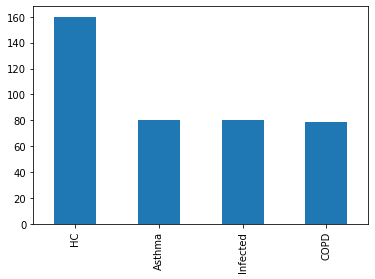

In [4]:
df['Diagnosis'].value_counts().plot(kind='bar')

In [5]:
df['Diagnosis'].value_counts()

HC          160
Asthma       80
Infected     80
COPD         79
Name: Diagnosis, dtype: int64

<AxesSubplot:ylabel='Gender'>

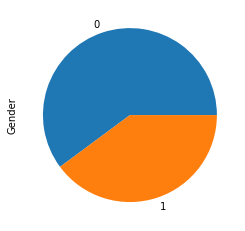

In [6]:
df['Gender'].value_counts().plot(kind='pie')

In [7]:
df['Gender'].value_counts()

0    240
1    159
Name: Gender, dtype: int64

<AxesSubplot:>

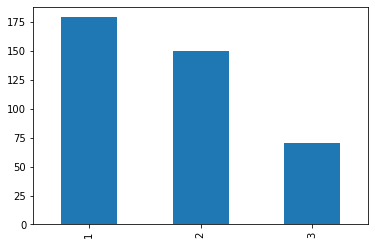

In [8]:
df['Smoking'].value_counts().plot(kind='bar')

In [9]:
df['Smoking'].value_counts()

1    179
2    150
3     70
Name: Smoking, dtype: int64

In [12]:
df=df.drop('ID',axis=1)

In [13]:
df.isnull().sum()

Diagnosis             0
Imagery_part_min    299
Imagery_part_avg    299
Real_part_min       299
Real_part_avg       299
Gender                0
Age                   0
Smoking               0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [19]:
df.head()

,Diagnosis,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,1,6,79,9,68,1,60,1
1,1,4,44,14,32,0,55,1
2,1,5,31,13,12,1,56,2
3,1,3,33,14,36,1,59,1
4,1,4,39,12,4,0,48,1


In [20]:
df.isnull().sum()

Diagnosis           0
Imagery_part_min    0
Imagery_part_avg    0
Real_part_min       0
Real_part_avg       0
Gender              0
Age                 0
Smoking             0
dtype: int64

In [21]:
df.columns

Index(['Diagnosis', 'Imagery_part_min', 'Imagery_part_avg', 'Real_part_min',
       'Real_part_avg', 'Gender', 'Age', 'Smoking'],
      dtype='object')

In [23]:
X=df[['Imagery_part_min', 'Imagery_part_avg', 'Real_part_min',
       'Real_part_avg', 'Gender', 'Age', 'Smoking']]

In [28]:
y=df[['Diagnosis']]

In [30]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [54]:
X_train.shape

(319, 7)

In [55]:
y_train.shape

(319, 1)

In [56]:
y_test.shape

(80, 1)

In [57]:
y_test.shape

(80, 1)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
T1=DecisionTreeClassifier(criterion='entropy')

In [64]:
T1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
y_pred=T1.predict(X_test)

In [68]:
y_pred[0:5]

array([2, 3, 3, 1, 2])

In [69]:
y_test[0:5]

,Diagnosis
372,3
191,2
184,2
54,1
263,0


In [70]:
from sklearn import metrics

In [71]:
print(metrics.accuracy_score(y_pred,y_test))

0.4875


In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
KNN=KNeighborsClassifier(n_neighbors=4)

In [80]:
KNN.fit(X_train,y_train)

/Users/fidaalibaig/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [81]:
y_hat=KNN.predict(X_test)

In [82]:
y_hat[0:5]

array([2, 2, 0, 0, 2])

In [84]:
print(y_test[0:5])

     Diagnosis
372          3
191          2
184          2
54           1
263          0


In [85]:
print(metrics.accuracy_score(y_hat,y_test))

0.575


In [86]:
from sklearn import svm

In [90]:
clf = svm.SVC(kernel='linear', C=1.0)

In [91]:
clf.fit(X_train,y_train)

/Users/fidaalibaig/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [92]:
y_predict=clf.predict(X_test)

In [93]:
y_predict[0:5]

array([2, 2, 2, 1, 2])

In [94]:
print(metrics.accuracy_score(y_predict,y_test))

0.6
